<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/Task_3_Machine_Learning_Model_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Mohamad Rayi Dwi Putra
Nim : 1103213070
Lecture 3
Decision Tree on iris dataset
Dokumentasi ChatGPT : https://chat.openai.com/share/a4e1abb2-e046-4934-bbac-29c2a734d819

Library

In [21]:
# Impor library yang diperlukan
import pandas as pd  # Untuk manipulasi data
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi data pelatihan dan pengujian
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Untuk membuat model Decision Tree dan memvisualisasikannya
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Untuk mengevaluasi kinerja model
import matplotlib.pyplot as plt  # Untuk memvisualisasikan confusion matrix
from google.colab import drive  # Untuk mount Google Drive

Membaca dataset

In [22]:
# Mount Google Drive
drive.mount('/content/drive')

# Path ke file CSV di Google Drive
file_path = '/content/drive/MyDrive/Dataset/iris.data.csv'

# Membaca dataset dari file CSV
dataset = pd.read_csv(file_path)

dataset


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


Pembuatan Model

In [23]:
dataset.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Memisahkan fitur (X) dan label (y)
X = dataset.drop('class', axis=1)  # Fitur adalah semua kolom kecuali kolom label
y = dataset['class']  # Label adalah kolom 'species'

# Membagi dataset menjadi data pelatihan dan pengujian (80% untuk pelatihan, 20% untuk pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier()

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

DecisionTreeClassifier()

Menghitung Akurasi

In [24]:
# Memprediksi label untuk data pengujian
predictions = model.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, predictions)
print("Akurasi:", accuracy)

# Mencetak laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, predictions))


Akurasi: 0.9

Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.67      0.80         9
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.90        30
      macro avg       0.93      0.89      0.89        30
   weighted avg       0.92      0.90      0.90        30



Visualisasi Model

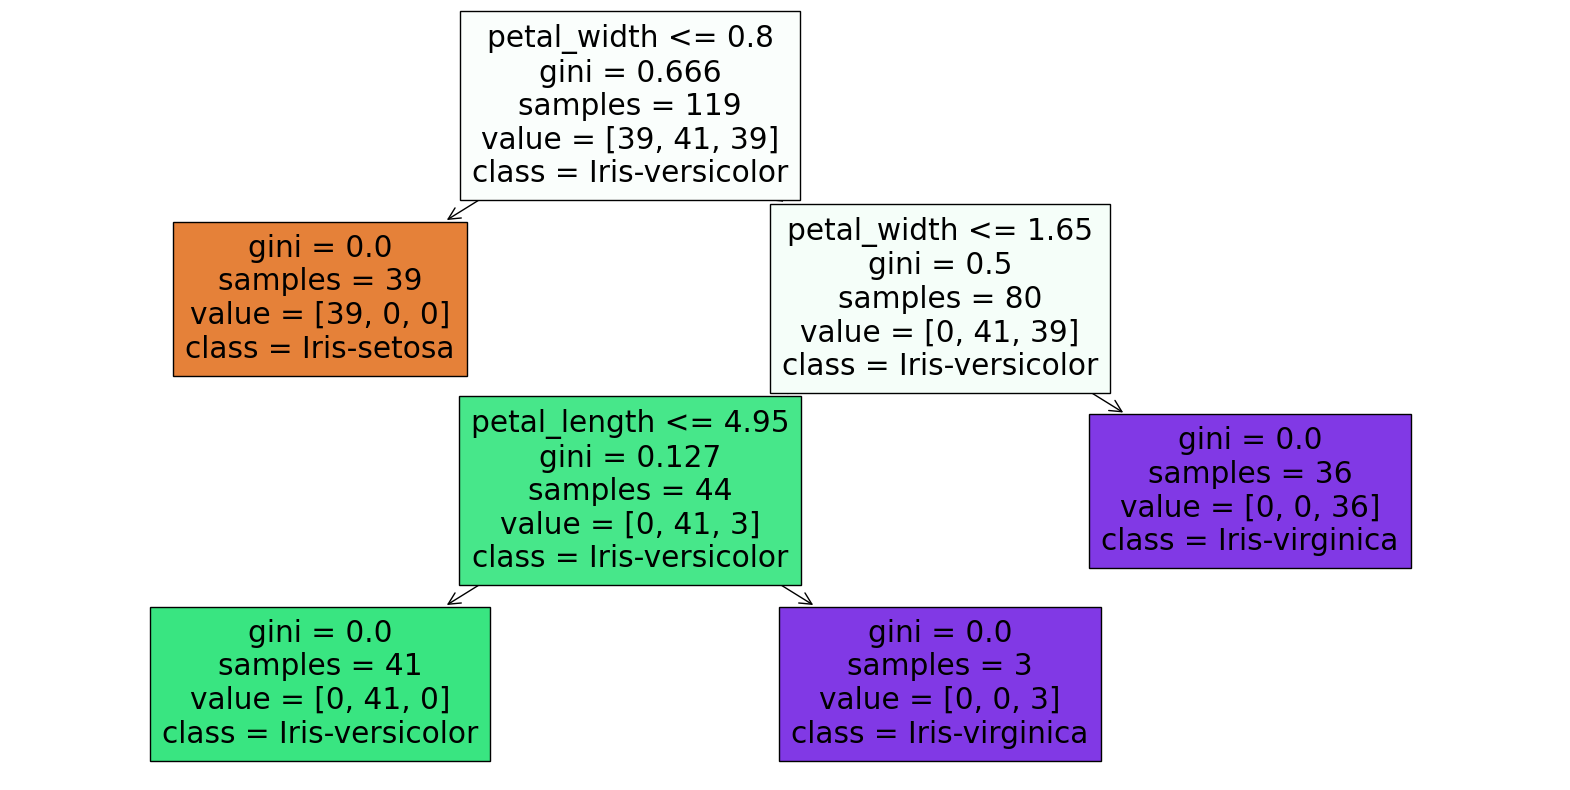

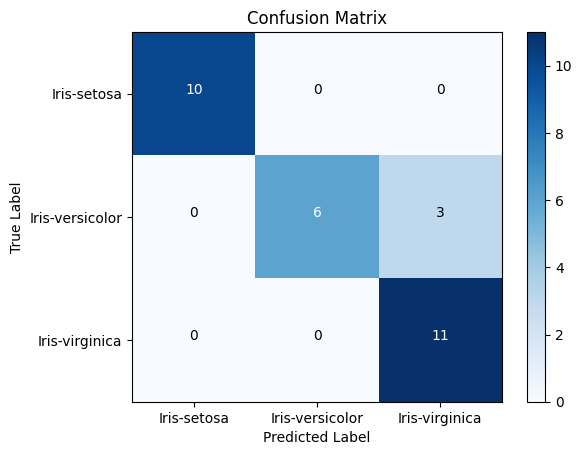

In [25]:
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()

# Visualisasi Confusion Matrix
conf_mat = confusion_matrix(y_test, predictions)
plt.imshow(conf_mat, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
tick_marks = range(len(y.unique()))
plt.xticks(tick_marks, y.unique())
plt.yticks(tick_marks, y.unique())

# Annotate confusion matrix with counts
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, conf_mat[i, j], horizontalalignment='center', color='white' if conf_mat[i, j] > conf_mat.max() / 2 else 'black')

plt.show()
